In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

## Task 1

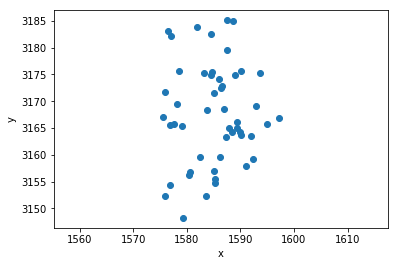

In [2]:
# create samples
mean_x = 10**(32/10)
mean_y = 2 * mean_x

var_x = (10**(15/10) / 6)**2
var_y = 4 * var_x

mean = [mean_x, mean_y]

c = 10**(5/10)
cov = [[var_x, c], [c, var_y]]

x, y = np.random.multivariate_normal(mean, cov, 50).T

# plot samples
plt.scatter(x, y)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Task 2 / 3

In [3]:
def classify_1d(file):
    data, labels = np.genfromtxt(file, delimiter=';').T

    clf = svm.SVC(kernel='linear')
    clf.fit([(d, 0) for d in data], labels)
    
    classes = {}
    for i, l in enumerate(labels):
        if l not in classes:
            classes[l] = []

        classes[l].append(data[i])

    for c in classes:
        plt.hist(classes[c], label='label: {}'.format(c))

    plt.axvline(-clf.intercept_[0] / clf.coef_[0][0], color='k')

    plt.legend()
    plt.show()
    
    return clf

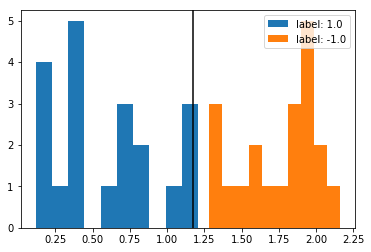

In [4]:
classify_1d('data1.csv');

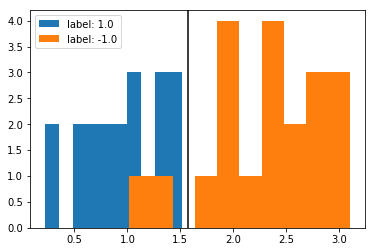

In [5]:
classify_1d('data2.csv');

## Task 4 / 5

In [6]:
def classify_2d(data):
    x, y, labels = np.genfromtxt(data, delimiter=';').T

    clf = svm.SVC(kernel='linear')
    clf.fit(list(zip(x, y)), labels)

    classes = {}
    for i, l in enumerate(labels):
        if l not in classes:
            classes[l] = [[], []]

        classes[l][0].append(x[i])
        classes[l][1].append(y[i])

    for c in classes:
        plt.scatter(classes[c][0], classes[c][1], label='label: {}'.format(c))

    x = np.linspace(-1, 5)
    y = -clf.coef_[0][0] / clf.coef_[0][1] * x - (clf.intercept_[0]) / clf.coef_[0][1]
    plt.plot(x, y, 'k-')

    plt.legend()
    plt.show()
    
    return clf

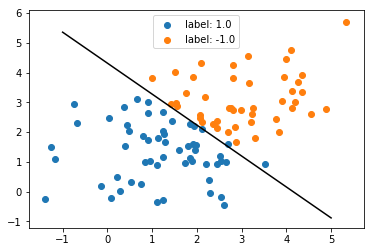

In [7]:
classify_2d('data3.csv');

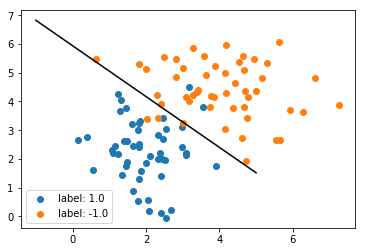

In [8]:
classify_2d('data4.csv');